In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

from sklearn.cluster import KMeans

datalist = [f for f in glob.glob("Dataset/*.csv")]
print('have stock = ',len(datalist))
    

have stock =  60


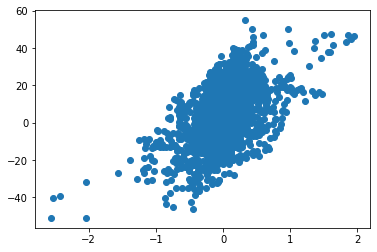

In [75]:

df = pd.read_csv(datalist[2])
df['MACD-SL'] = df['MACD'] - df['SIGNAL LINE']
df['DMI-SIGNAL'] = df['plusDI'] - df['minusDI']
plt.scatter(df['MACD-SL'],df['DMI-SIGNAL'])

In [76]:
X = []
for i ,r in df.iterrows():
    X.append([r['MACD-SL'],r['DMI-SIGNAL']])


In [77]:
km = KMeans(n_clusters=6, random_state=0).fit(X)

In [78]:
kml = km.labels_
df['k-mean'] = kml 

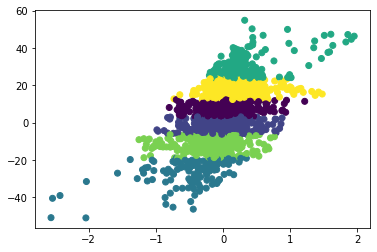

In [79]:
plt.scatter(df['MACD-SL'],df['DMI-SIGNAL'],c=km.labels_.astype(float))

In [80]:
# df.to_csv('dataset.csv')

In [81]:
df.loc[df['Signal'] == 'buy', 'Signal'] = 0
df.loc[df['Signal'] == 'sell', 'Signal'] = 1 
df.loc[df['Signal'] == 'wait or hold', 'Signal'] = 2 

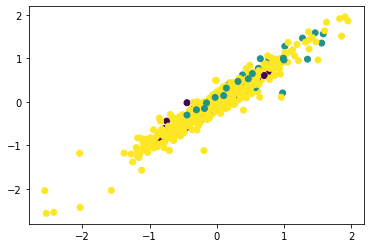

In [82]:
plt.scatter(df['MACD-SL'],df['MACD-SL'].shift(1),c=df['Signal'].values)